### Libs usadas durante o trabalho

In [1]:
import numpy as np
import regex as re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estudo de caso de uma das maiores discussões que a humanidade moderna já presenciou:

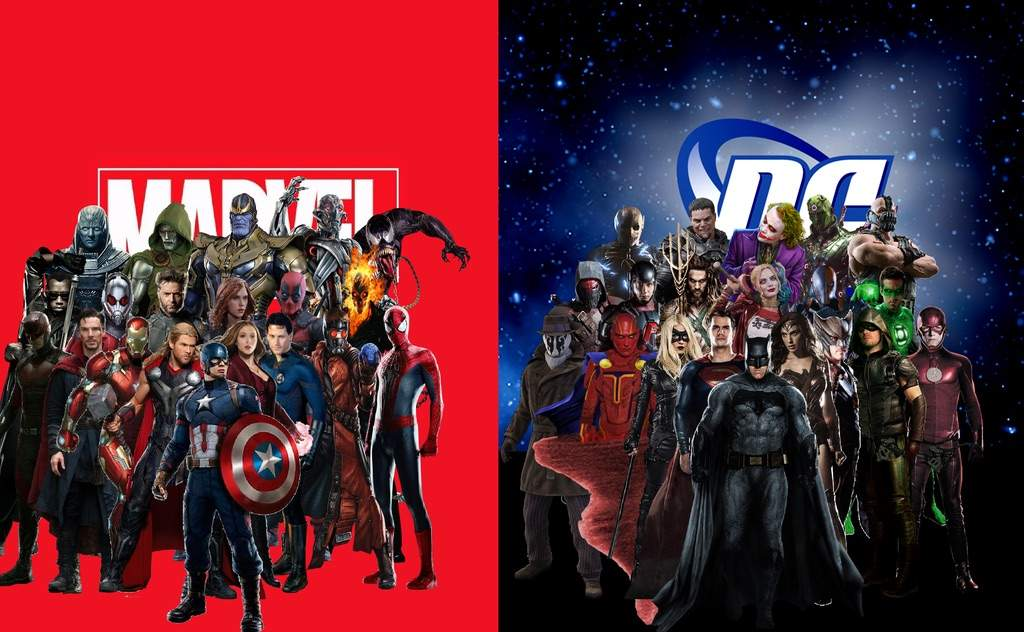

### Aluno: Davi Segundo Pinheiro

No universo que cerca os nerds existe uma grande discussão que perdura durante milênios, atravessa eras, que já viu reinos caírem, potências se erguerem e ela perdura incessantemente. O universo dos super heróis é algo bastante popular entre a maioria da população, e as duas maiores produtoras de filmes desse tema tão amado são a Marvel e a DC. Existe uma grande rivalidade entre essas duas, principalmente pelos seguidores fanáticos de cada uma…(na minha opnião, quem gosta desse universo, gosta das duas, pois cada uma tem sua peculiaridade).

Nesse contexto, vamos explorar um Dataset que reúne algumas informações sobre diversos títulos que foram produzidos por essas duas gigantes do entretenimento, com o intuito de descobrir algumas informações interessantes que possam auxiliar na resolução dessa discussão milenar. Usaremos nessa exploração os títulos que foram avaliados por uma grande quantidade de pessoas, para assim termos uma boa consolidação das informações.

Para isso vamos usar algumas perguntas guias para orientar nossa análise de dados e conseguir ressaltar informações importantes do nosso Dataset:

 - **1. Quais os filmes foram mais bem avaliados?**
 - **2. Qual a influência da classificação etária na nota do filme?**
 - **3. Como estão distribuídos os lançamentos dos filmes?**
 - **4. Quais os melhores diretores?**

# Pré-processamento

## Leitura dos dados

In [2]:
dados = pd.read_csv("Marvel_DC_imdb.csv")

# Remoção da coluna sem relevância
dados = dados.drop(columns=["Unnamed: 0"])

display(dados.head())
dados.shape

,Movie,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category
0,Eternals,(2021),"Action,Adventure,Drama",NaN,NaN,ChloéZhao,"AngelinaJolie,GemmaChan,RichardMadden,BarryKeo...","The saga of the Eternals, a race of immortal b...",NaN,NaN,NaN,NaN,Marvel
1,Loki,(2021– ),"Action,Adventure,Fantasy",NaN,NaN,NaN,"TomHiddleston,OwenWilson,SophiaDiMartino,Richa...",A new Marvel chapter with Loki at its center.,NaN,NaN,NaN,NaN,Marvel
2,The Falcon and the Winter Soldier,(2021),"Action,Adventure,Drama",50 min,TV-14,NaN,"AnthonyMackie,SebastianStan,WyattRussell,ErinK...","Following the events of 'Avengers: Endgame,' S...",7.5,NaN,"105,557",NaN,Marvel
3,WandaVision,(2021),"Action,Comedy,Drama",350 min,TV-PG,NaN,"ElizabethOlsen,PaulBettany,KathrynHahn,Teyonah...",Blends the style of classic sitcoms with the M...,8.1,NaN,"174,710",NaN,Marvel
4,Spider-Man: No Way Home,(2021),"Action,Adventure,Sci-Fi",NaN,NaN,JonWatts,"AngourieRice,TomHolland,Zendaya,MarisaTomei",A continuation of Spider-Man: Far From Home.,NaN,NaN,NaN,NaN,Marvel


(1690, 13)

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie        1690 non-null   object 
 1   Year         1657 non-null   object 
 2   Genre        1683 non-null   object 
 3   RunTime      1407 non-null   object 
 4   Rating       1463 non-null   object 
 5   Director     1474 non-null   object 
 6   Actor        1660 non-null   object 
 7   Description  1690 non-null   object 
 8   IMDB_Score   1486 non-null   float64
 9   Metascore    65 non-null     float64
 10  Votes        1486 non-null   object 
 11  USA_Gross    64 non-null     object 
 12  Category     1690 non-null   object 
dtypes: float64(2), object(11)
memory usage: 171.8+ KB


Aqui já podemos ver que temos alguns problemas quanto a tipagem dos dados de algumas colunas, pois tanto a coluna **"Year"** e **"Votes"** que deveriam ser do tipo númerico estão sendo tratadados como **object**. Portanto teremos que resolver isso mais adiante.

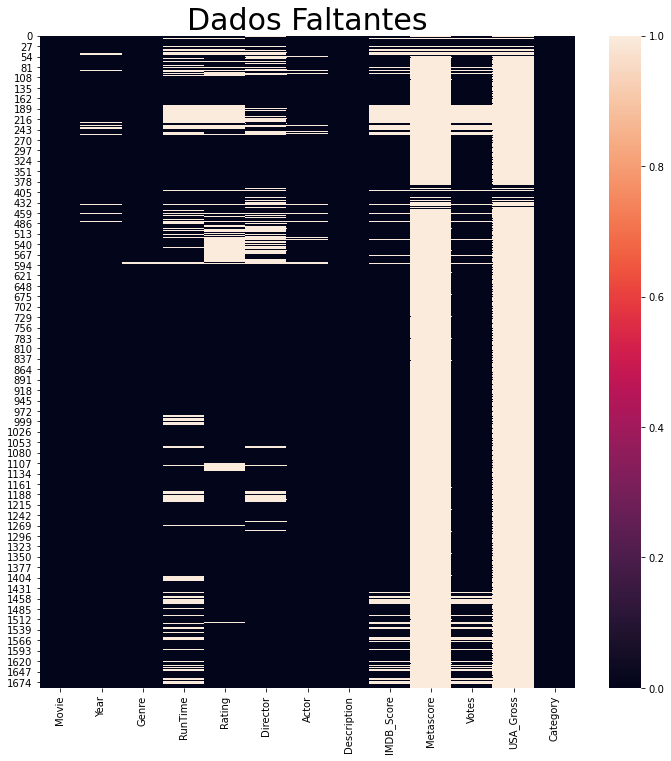

In [4]:
plt.figure(figsize=(12,12))
plt.title("Dados Faltantes", size=30)
sns.heatmap(dados.isna());

Análise para ver os dados faltantes e como estava a distribuição deles pelo Dataset.

## Limpeza dos dados

### Remoção de colunas não tão relevantes

Aqui vamos fazer a remoção de algumas tabelas que estão com **muitos dados faltantes** e que **não vão agregar muita informação** relevante para nossa análise.

In [5]:
dados = dados.drop(columns=["Metascore", "USA_Gross"])
dados = dados.drop(columns=["RunTime", "Actor", "Description"])

display(dados.head(5))
dados.columns

,Movie,Year,Genre,Rating,Director,IMDB_Score,Votes,Category
0,Eternals,(2021),"Action,Adventure,Drama",NaN,ChloéZhao,NaN,NaN,Marvel
1,Loki,(2021– ),"Action,Adventure,Fantasy",NaN,NaN,NaN,NaN,Marvel
2,The Falcon and the Winter Soldier,(2021),"Action,Adventure,Drama",TV-14,NaN,7.5,"105,557",Marvel
3,WandaVision,(2021),"Action,Comedy,Drama",TV-PG,NaN,8.1,"174,710",Marvel
4,Spider-Man: No Way Home,(2021),"Action,Adventure,Sci-Fi",NaN,JonWatts,NaN,NaN,Marvel


Index(['Movie', 'Year', 'Genre', 'Rating', 'Director', 'IMDB_Score', 'Votes',
       'Category'],
      dtype='object')

Aqui ficamos com as essas colunas que trazem algumas informações bem interessantes e que poderemos ver como estão influenciando cada um dos títulos.

### Remoção dos dados faltantes

 Verificação de quantos dos dados ainda estão faltando em **cada coluna**.

In [6]:
df_falta = dados.isna().sum()

display(pd.DataFrame(df_falta, columns=["Faltantes"]))
display(dados.shape[0])

,Faltantes
Movie,0
Year,33
Genre,7
Rating,227
Director,216
IMDB_Score,204
Votes,204
Category,0


1690

In [7]:
dados = dados.dropna()
dados.shape[0]

1283

Após a remoção dos dados faltantes ficamos com **1283 linhas de dados restantes**.

### Modelagem de algumas informações

Aqui fazemos a transformação da coluna **"Votes"**, que inicialmente estavam sendo tratados como strings para uma informação do tipo INT.

In [8]:
votos = dados["Votes"]
regex_num = re.compile(r",")
infos = list()

for voto in votos:
    info = regex_num.sub("", voto)
    infos.append(int(info))
    
dados["Votes"] = infos

Após algumas olhadas em algumas informações de todo o Dataset, resolvi fazer a análise apenas dos títulos que foram mais avaliados, para assim conseguir informações mais sólidas, já que eles possuem a opnião de mais pessoas.

Para isso fiz uma seleção do Dataset com os títulos que tiveram mais de **100.000**(cem mil) **avaliações**.

In [9]:
dados = dados.loc[dados["Votes"] > 100000]

In [10]:
coluna = "Movie"
info = "I Am Legend"

dados.loc[dados[coluna] == info]

,Movie,Year,Genre,Rating,Director,IMDB_Score,Votes,Category
412,I Am Legend,(2007),"Action,Adventure,Drama",PG-13,FrancisLawrence,7.2,698805,DC


Na célula abaixo foi feita a remoção de alguns **outliers**.

In [11]:
filmes_del = [41, 407, 412, 424, 426, 429]
dados = dados.drop(index=filmes_del)

dados

,Movie,Year,Genre,Rating,Director,IMDB_Score,Votes,Category
6,Avengers: Endgame,(2019),"Action,Adventure,Drama",PG-13,"AnthonyRusso,JoeRusso",8.4,880911,Marvel
7,Guardians of the Galaxy,(2014),"Action,Adventure,Comedy",PG-13,JamesGunn,8.0,1066222,Marvel
9,Spider-Man: Far from Home,(2019),"Action,Adventure,Sci-Fi",PG-13,JonWatts,7.5,348047,Marvel
10,Thor: Ragnarok,(2017),"Action,Adventure,Comedy",PG-13,TaikaWaititi,7.9,615860,Marvel
11,Avengers: Infinity War,(2018),"Action,Adventure,Sci-Fi",PG-13,"AnthonyRusso,JoeRusso",8.4,881638,Marvel
12,Black Panther,(2018),"Action,Adventure,Sci-Fi",PG-13,RyanCoogler,7.3,652032,Marvel
13,Captain Marvel,(2019),"Action,Adventure,Sci-Fi",PG-13,"AnnaBoden,RyanFleck",6.9,470319,Marvel
15,Spider-Man: Homecoming,(2017),"Action,Adventure,Sci-Fi",PG-13,JonWatts,7.4,532946,Marvel
16,Avengers: Age of Ultron,(2015),"Action,Adventure,Sci-Fi",PG-13,JossWhedon,7.3,769385,Marvel
17,Captain America: The First Avenger,(2011),"Action,Adventure,Sci-Fi",PG-13,JoeJohnston,6.9,761947,Marvel


Fizemos o tratamento da coluna **"Year"** para remover os parênteses usando **regex**, e assim conseguir transformar em número para melhorar as análises adiante.

In [12]:
years = dados["Year"]
regex_year = re.compile(r"\W")
infos_year = list()

for year in years:
    info_y = regex_year.sub("", year)
    infos_year.append(int(info_y))
    
dados["Year"] = infos_year

In [13]:
dados.Category.value_counts()

Marvel    25
DC        21
Name: Category, dtype: int64

Ao final de todo essa modelagem dos dados ficamos com conjunto pequeno de dados comparada ao que tinhamos inicialmente, mas podemos tirar informações bem interessantes deles. Uma coisa bem curiosa é que após tudo isso, ficamos com um conjunto de dados com **25 filmes da Marvel** e **21 filmes da DC**.

# Análise dos dados

Verificação se existe alguma correlação entre os dados numéricos do nosso Dataset.

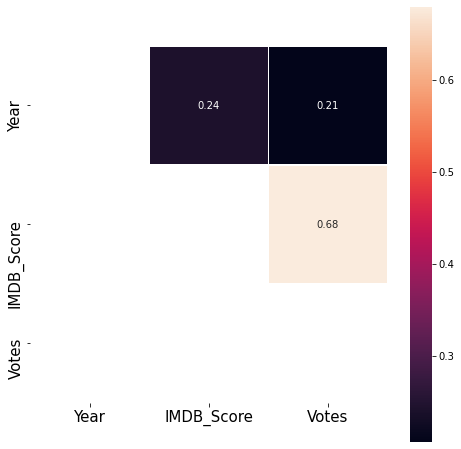

In [14]:
corr_matrix = dados.corr()
mask = np.tril(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(8,8))
sns_r = sns.heatmap(corr_matrix, annot=True, fmt=".2f", 
            mask=mask, linecolor='white', 
            linewidths=.8, square=True)
sns_r.tick_params(labelsize=15)

Com isso é possível perceber que não existe uma correlação muito grande entre a data de lançamento e a nota que o filme recebeu e também não existe muita correlação entre a data de lançamento e a quantidade de votos.

### 1. Quais os filmes foram mais bem avaliados?

Vamos analisar quais os filmes que receberam as maiores notas dentre as duas grandes produtoras. Dessa forma vamos poder ver quais os maiores sucessos entre os filmes com maior popularidade no universo dos super heróis.

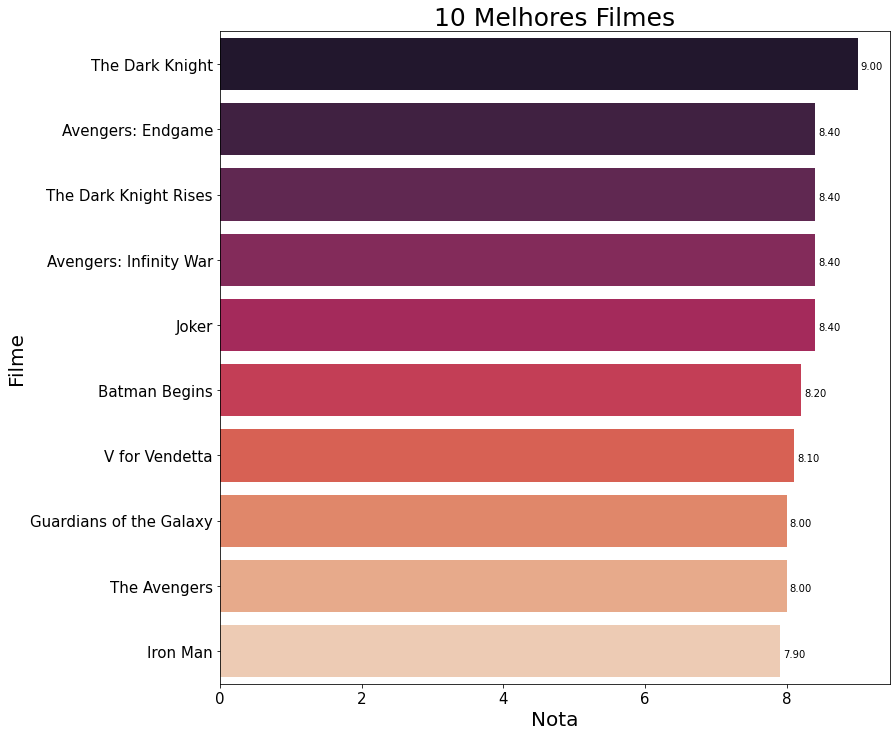

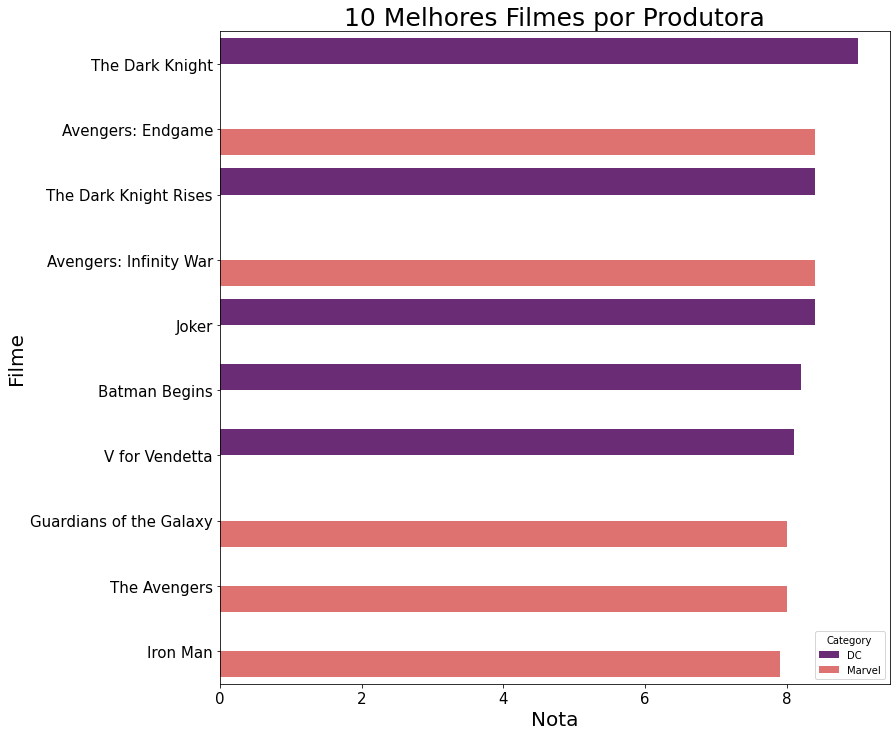

In [28]:
melhores = dados.sort_values(by="IMDB_Score", ascending=False)
melhores_20 = melhores[:10]

plt.figure(figsize=(12,12))
sns_t = sns.barplot(x=melhores_20["IMDB_Score"], 
                    y=melhores_20["Movie"], 
                    palette="rocket")

sns_t.axes.set_title("10 Melhores Filmes",fontsize=25)
sns_t.set_xlabel("Nota", size=20)
sns_t.set_ylabel("Filme", size=20);
sns_t.tick_params(labelsize=15)

for p in sns_t.patches:
    width = p.get_width()
    plt.text(0.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
    
plt.figure(figsize=(12,12))
sns_t = sns.barplot(x=melhores_20["IMDB_Score"], 
                    y=melhores_20["Movie"], 
                    palette="magma", 
                    hue=melhores_20.Category)

sns_t.axes.set_title("10 Melhores Filmes por Produtora",fontsize=25)
sns_t.set_xlabel("Nota", size=20)
sns_t.set_ylabel("Filme", size=20);
sns_t.tick_params(labelsize=15)

Aqui demonstramos os 15 filmes mais bem avaliados entre os grandes sucessos das duas produtoras. Na minha humilde opinião, eu concordo plenamente com o TOP 4, pois são filmes realmente excepcionais, os quais trouxeram cada um deles um aspecto cinematográfico único para o público. O **TOP 5** desse Dataset ficou ocupado por **3 filmes da DC e 2 filmes da Marvel**.

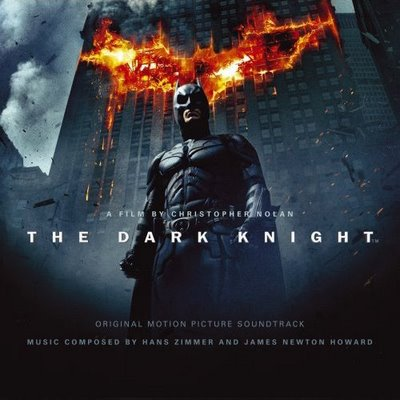

Certamente o primeiro lugar não poderia ser outro, o qual ficou com “O Cavaleiro das Trevas”. Esse é um filme que tem uma qualidade indiscutível por diversos aspectos, porém o fator que tornou esse filme um grande sucesso foi com certeza o vilão, nesse caso o Coringa, que foi interpretado por Heath Ledger, que conseguiu uma atuação tão genial que conquistou a todos com os detalhes que transformou o personagem em uma referência. Não é atoa que sua nota se destaca um pouco das outras, atingindo os **9.0 pontos**.

### 2. Qual a influência da classificação etária na nota do filme?

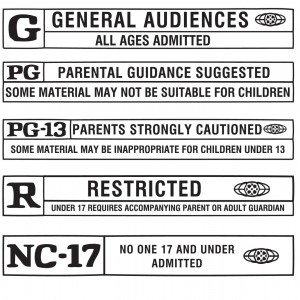

A classificação etária é uma característica que influencia em quem é o público que pode assistir aquele conteúdo. Nesse caso, ficamos com as categorias **PG, PG-13 e R**.  Assim, temos que PG é destinado ao público mais jovem, PG-13 destinado ao jovens adolescentes e R destinado aos jovens adultos.

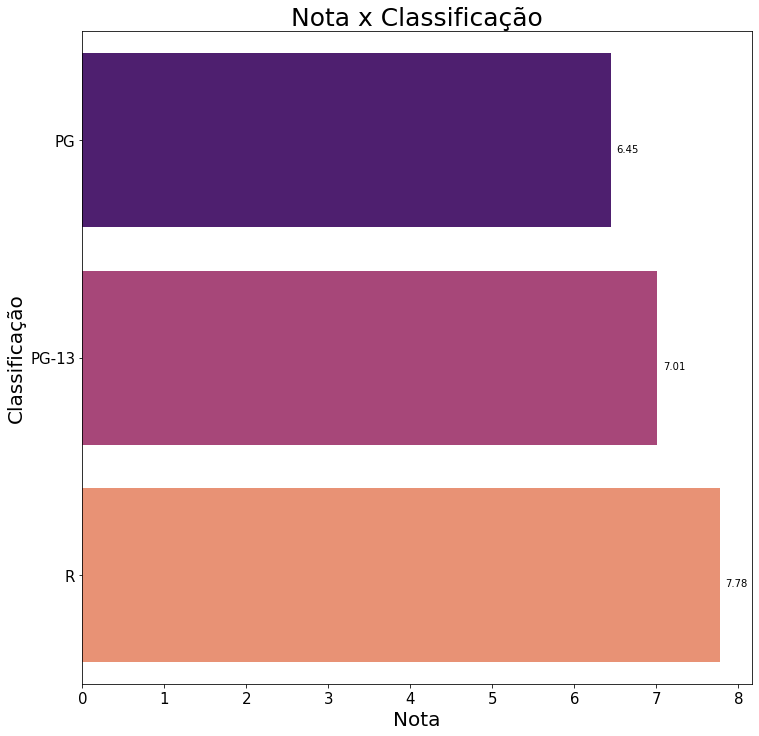

In [16]:
dados_rating = dados.groupby("Rating").mean()

plt.figure(figsize=(12,12))
sns_d = sns.barplot(x=dados_rating.IMDB_Score, 
                    y=dados_rating.index, 
                    palette="magma")

sns_d.axes.set_title("Nota x Classificação",fontsize=25)
sns_d.set_xlabel("Nota", size=20)
sns_d.set_ylabel("Classificação", size=20);
sns_d.tick_params(labelsize=15)

for p in sns_d.patches:
    width = p.get_width()
    plt.text(0.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

Aqui podemos perceber que essa classificação teve uma certa influência na nota que o filme recebeu, pois podemos ver que os filmes **mais bem avaliados** foram os classificados como **R**, os quais possivelmente tem certos conteúdos mais violentos e coisas do tipo.
Já os que receberam piores avaliações em média foram os destinados ao público mais infantil, porém como nossa amostragem não é muito grande, temos que o dado é prejudicado pela péssima avaliação que o **Filme do Quarteto Fantástico**, que realmente foi de uma qualidade bem duvidosa... 

In [17]:
print("Filmes com classificação PG:")
display(dados.loc[dados["Rating"] == "PG"])
print("\nFilmes com classificação R:")
display(dados.loc[dados["Rating"] == "R"])

Filmes com classificação PG:


,Movie,Year,Genre,Rating,Director,IMDB_Score,Votes,Category
42,Fantastic 4: Rise of the Silver Surfer,2007,"Action,Adventure,Fantasy",PG,TimStory,5.6,253509,Marvel
418,Superman,1978,"Action,Adventure,Drama",PG,RichardDonner,7.3,161927,DC



Filmes com classificação R:


,Movie,Year,Genre,Rating,Director,IMDB_Score,Votes,Category
392,Joker,2019,"Crime,Drama,Thriller",R,ToddPhillips,8.4,1004600,DC
395,Watchmen,2009,"Action,Drama,Mystery",R,ZackSnyder,7.6,516400,DC
410,V for Vendetta,2005,"Action,Drama,Sci-Fi",R,JamesMcTeigue,8.1,1049937,DC
416,Constantine,2005,"Action,Fantasy,Horror",R,FrancisLawrence,7.0,314439,DC


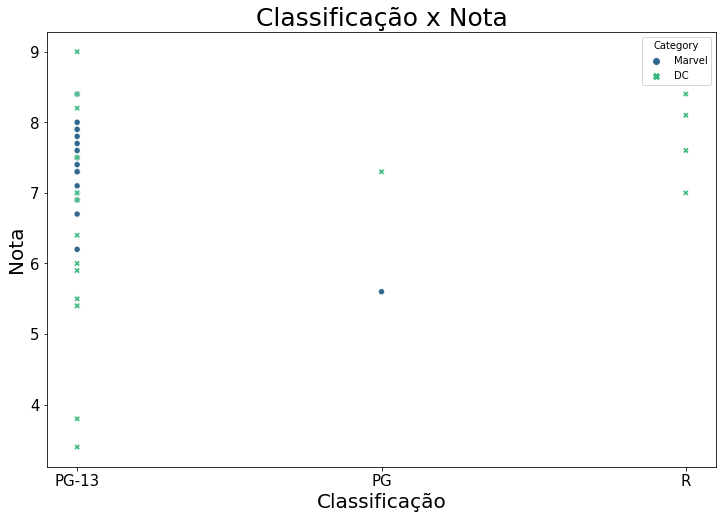

In [18]:
plt.figure(figsize=(12,8))
sns_l = sns.scatterplot(x=dados.Rating, 
                        y=dados.IMDB_Score, 
                        hue=dados.Category, 
                        style=dados.Category, 
                        palette="viridis")

sns_l.axes.set_title("Classificação x Nota",fontsize=25)
sns_l.set_xlabel("Classificação", size=20)
sns_l.set_ylabel("Nota", size=20);
sns_l.tick_params(labelsize=15)

Com essa distribuição dos pontos conseguimos perceber alguns detalhes bem interessantes. O principal deles é que a **grande maioria dos filmes** de super heróis são lançados na classificação de **PG-13**, ou seja, são destinados principalmente ao **público adolescente**, que realmente é a faixa etária que mais consome esse tipo de conteúdo. Outros fatores é que temos poucos filmes nas outras classificações etárias, o que é um fato decorrente do que foi percebido anteriormente. 

Ademais, podemos visualizar também que a **DC** é a produtora de mais filmes **destinados ao público adulto** e isso se deve ao seu **cenário mais sombrio** onde os personagens são desenvolvidos. Eles são também os que possuem uma **melhor consistência** nas avaliações, pois nenhum deles teve uma avaliação inferior a **7.0 pontos**.

### 3. Como estão distribuídos os lançamentos dos filmes?

Vamos tentar descobrir se existe alguma influência da data de lançamento na nota que o filme recebeu, e como cada uma das produtoras se comportou ao longo dos anos com seus títulos.

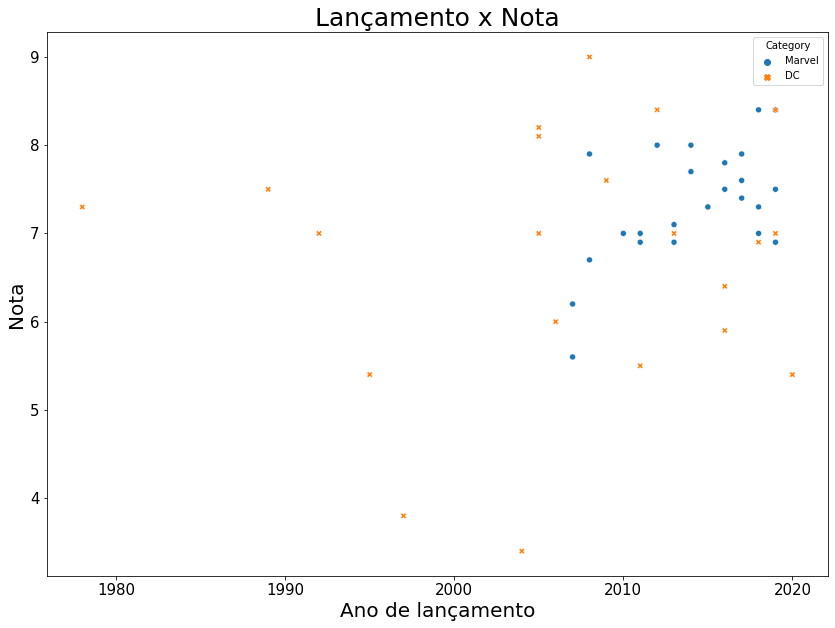

In [19]:
plt.figure(figsize=(14,10))
sns_w = sns.scatterplot(x=dados.Year, 
                        y=dados.IMDB_Score, 
                        hue=dados.Category, 
                        style=dados.Category)

sns_w.axes.set_title("Lançamento x Nota",fontsize=25)
sns_w.set_xlabel("Ano de lançamento", size=20)
sns_w.set_ylabel("Nota", size=20);
sns_w.tick_params(labelsize=15)

Com base nessa visualização conseguimos adquirir algumas informações bem interessantes, como a **DC produziu filmes em um intervalo de tempo bem maior**, possuindo já alguns títulos de **antes dos anos 2000**, enquanto a **Marvel fez muito mais lançamentos recentes começando pouco antes de 2010**. Além disso, outra característica sobre a distribuição desses pontos é que conseguimos ver um **agrupamento maior dos pontos correspondentes a Marvel**, ou seja, temos uma **proximidade maior dos lançamentos** e uma **consistência maior entre as notas que os filmes receberam**. 

Já a **DC possui pontos mais espalhados**, o que caracteriza um **intervalo maior entre os lançamentos** e uma **oscilação entre as notas** que os seus filmes receberam.

### 4. Quais os melhores diretores?

Dentre esses grandes filmes, podemos perceber que alguns diretores são nomes que aparecem mais de uma vez e outros que só fizeram apenas um título. Vamos tentar descobrir como eles fizeram a diferença, pois é fundamental a influência do diretor no resultado final do filme. Vamos analisar qual a relação entre os diretores e os filmes mais bem sucedidos.

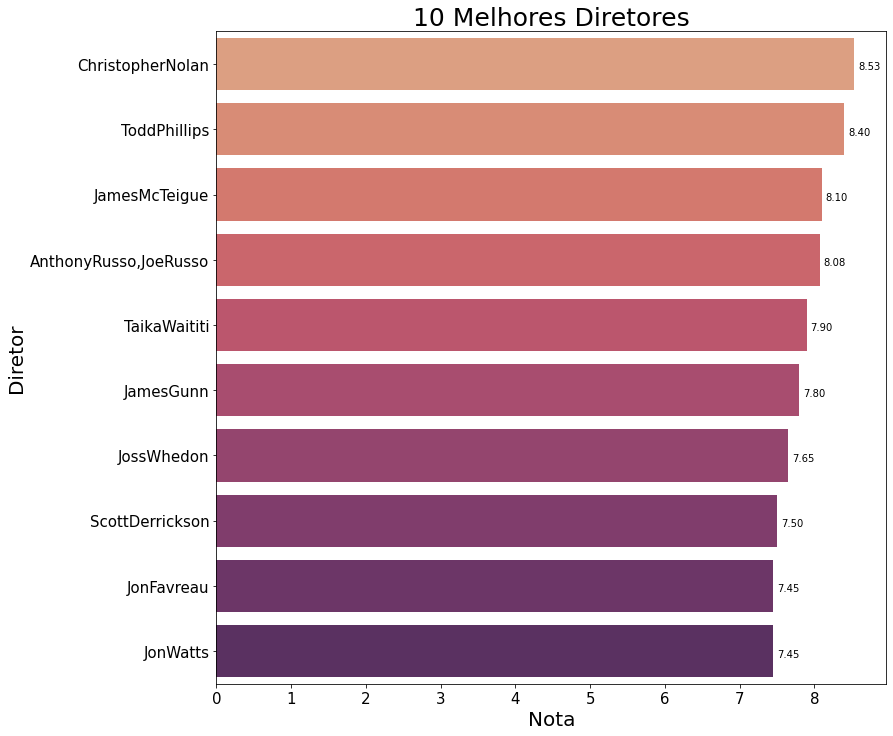

In [20]:
dados_diretor = dados.groupby("Director").mean()
dados_diretor_ordenados = dados_diretor.sort_values(by="IMDB_Score", 
                                                    ascending=False)
dados_diretor_ordenados = dados_diretor_ordenados[:10]

plt.figure(figsize=(12,12))
sns_f = sns.barplot(x=dados_diretor_ordenados["IMDB_Score"], 
                    y=dados_diretor_ordenados.index, 
                    palette="flare")

sns_f.axes.set_title("10 Melhores Diretores",fontsize=25)
sns_f.set_xlabel("Nota", size=20)
sns_f.set_ylabel("Diretor", size=20);
sns_f.tick_params(labelsize=15)

for p in sns_f.patches:
    width = p.get_width()
    plt.text(0.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

Com a análise da nota média de cada filme que o diretor produziu, temos que o **primeiro lugar** fica com o **Christopher Nolan**, que é o responsável pela **trilogia do Batman**, a qual ocupa as **primeiras posições** dentre todos os filmes que foram analisados.

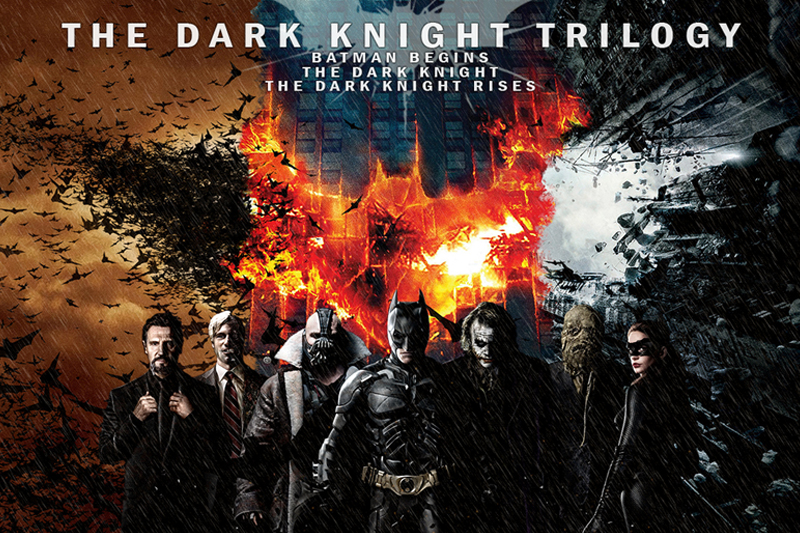

Na **segunda posição temos o Todd Phillips**, que apesar de só ter feito 1 filme, foi responsável pelo **novo filme do Coringa**, que trouxe um visão artística muito interessante sobre o personagem e fez muito sucesso com o público, pelos aspectos psicológicos que foram demonstrados durante o filme.

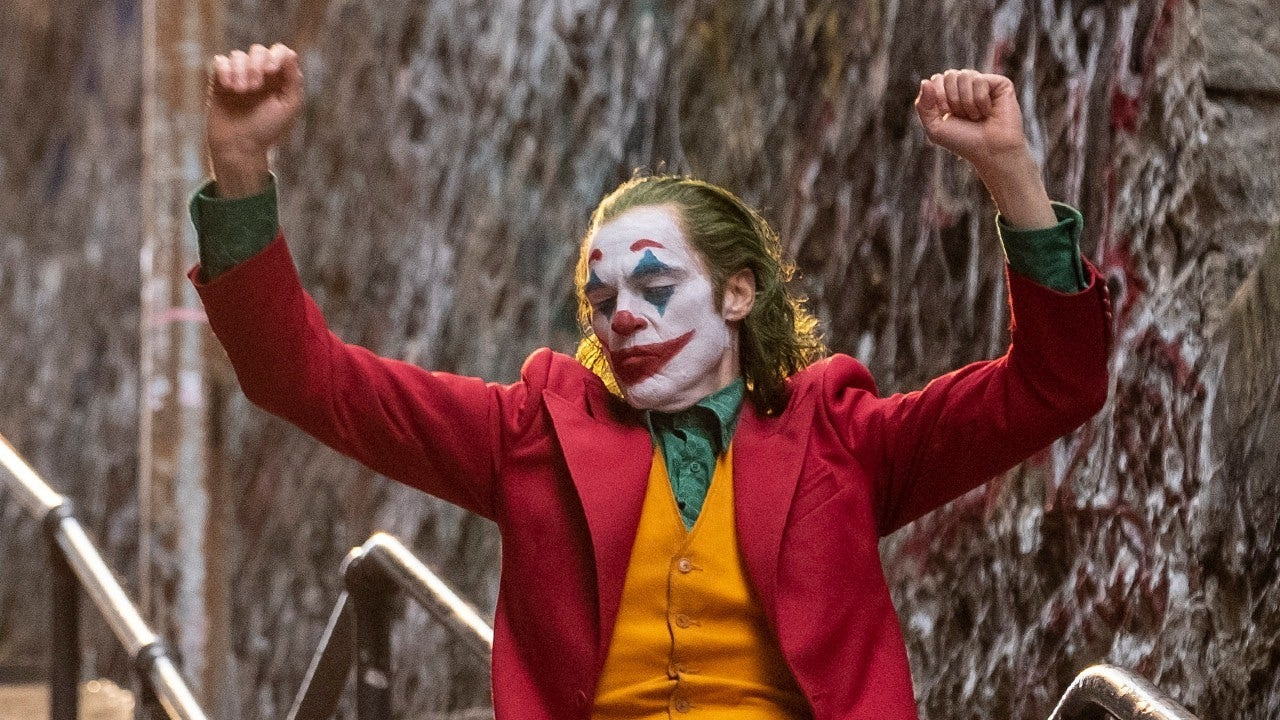

**Sendo os dois primeiros da DC**, não poderíamos deixar de mencionar **alguém da Marvel**:

Na **quarta posição temos os irmãos Russo**, que também tem um grande destaque nesse cenário, pois foram os responsáveis pelos **dois últimos filmes dos vingadores e os dois últimos filmes do Capitão América**. Os títulos **Infinity War e Endgame** ocupam o **TOP 5** dos filmes mais bem avaliados.

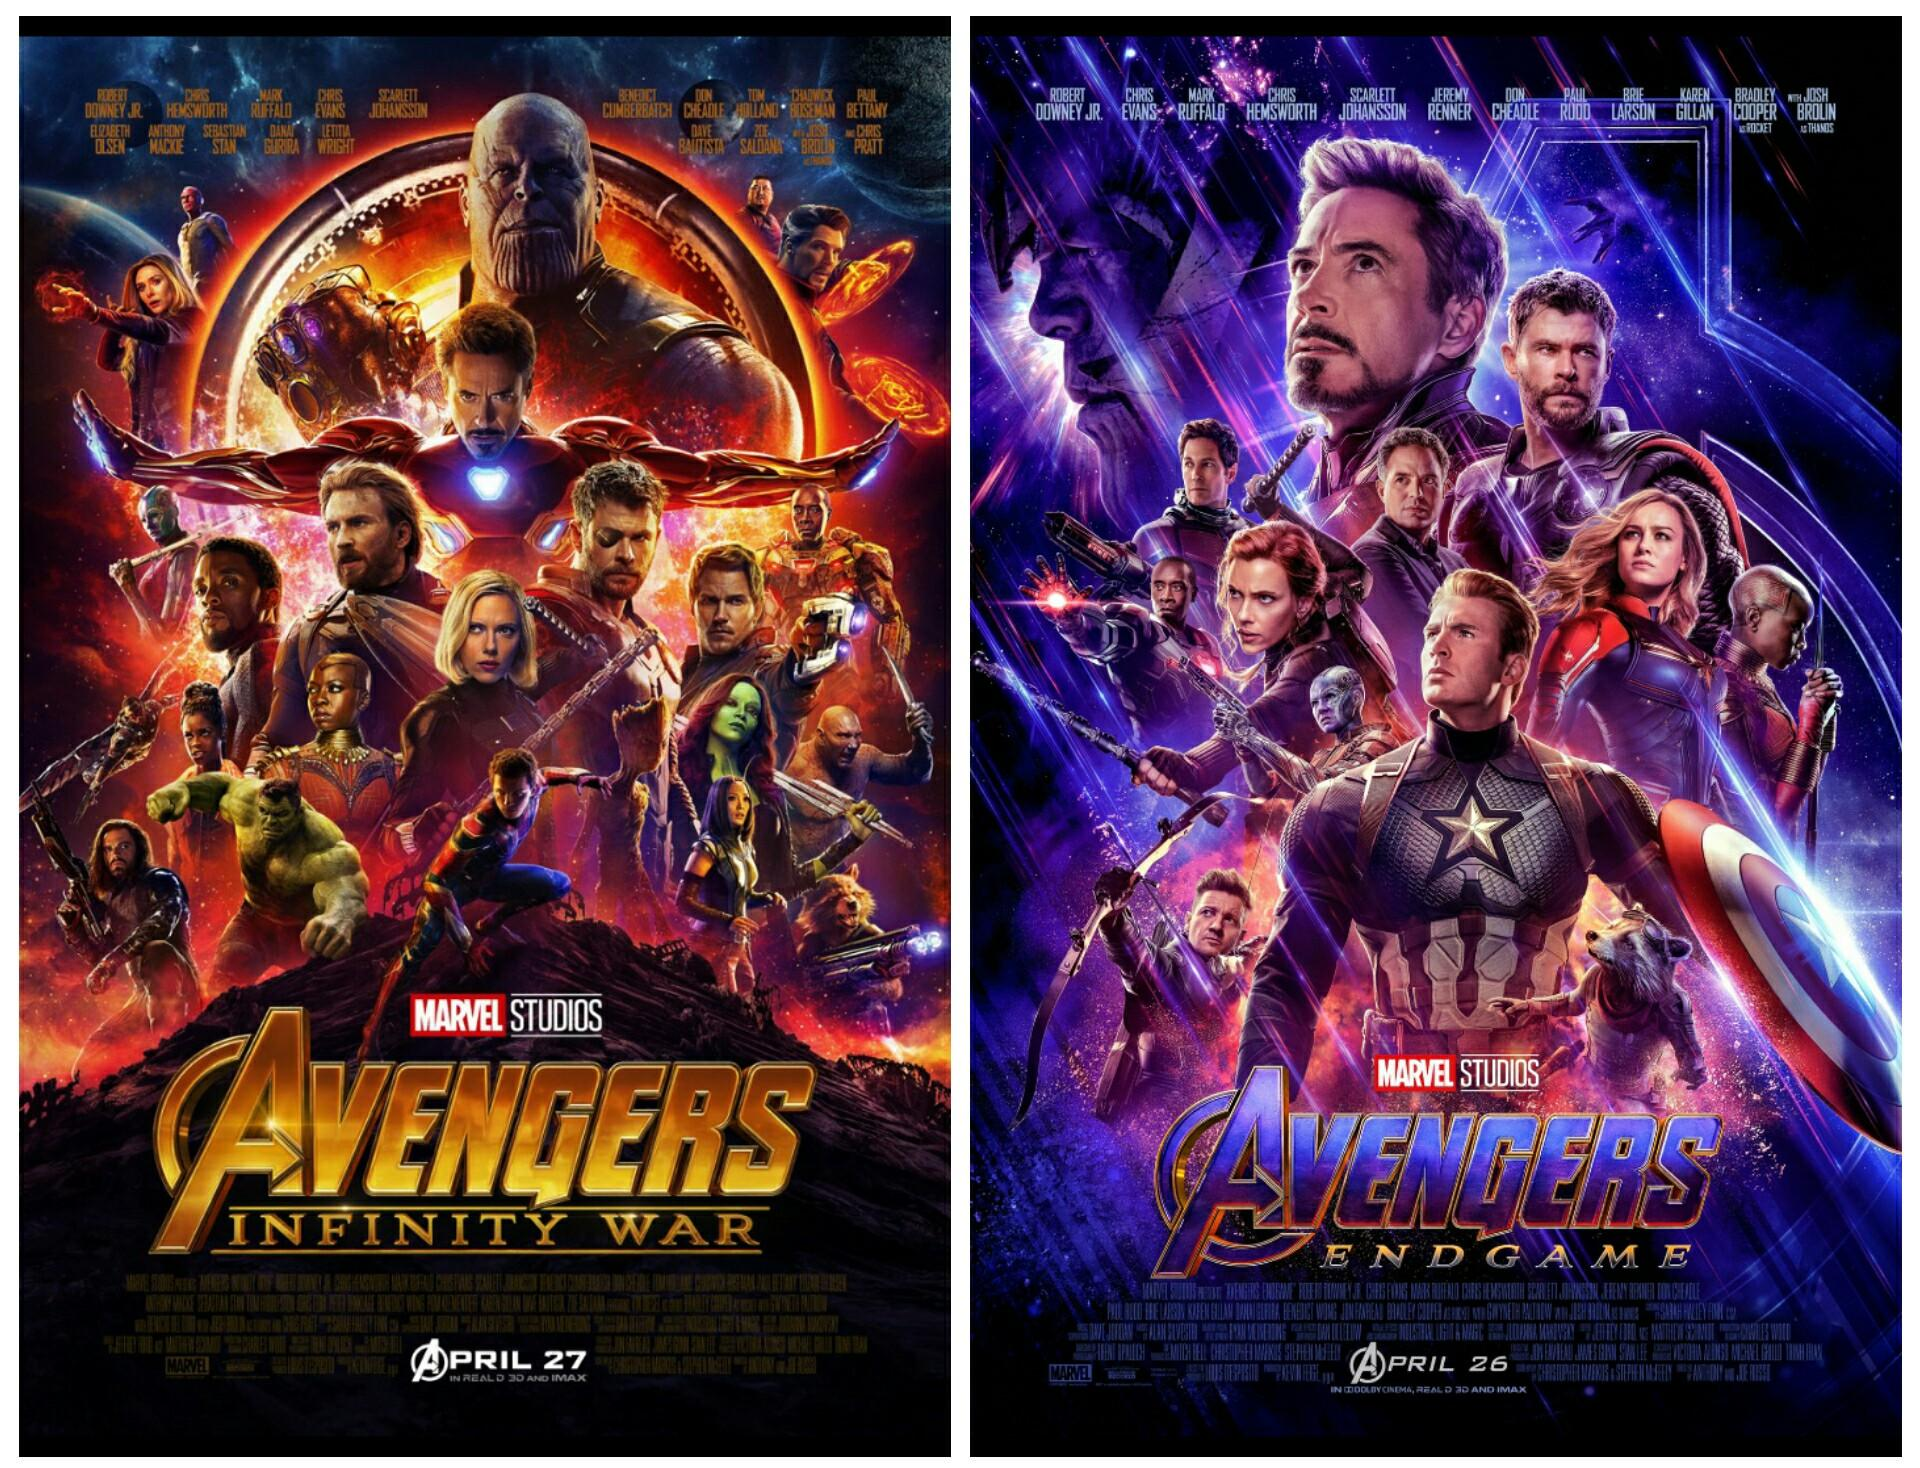

In [21]:
print("Filmes do Christopher Nolan:")
display(dados.loc[dados["Director"] == "ChristopherNolan"])
print("\nFilmes do Todd Phillips:")
display(dados.loc[dados["Director"] == "ToddPhillips"])
print("\nFilmes dos irmãos Russo:")
display(dados.loc[dados["Director"] == "AnthonyRusso,JoeRusso"])

Filmes do Christopher Nolan:


,Movie,Year,Genre,Rating,Director,IMDB_Score,Votes,Category
394,The Dark Knight,2008,"Action,Crime,Drama",PG-13,ChristopherNolan,9.0,2361064,DC
399,The Dark Knight Rises,2012,"Action,Adventure",PG-13,ChristopherNolan,8.4,1547852,DC
408,Batman Begins,2005,"Action,Adventure",PG-13,ChristopherNolan,8.2,1334536,DC



Filmes do Todd Phillips:


,Movie,Year,Genre,Rating,Director,IMDB_Score,Votes,Category
392,Joker,2019,"Crime,Drama,Thriller",R,ToddPhillips,8.4,1004600,DC



Filmes dos irmãos Russo:


,Movie,Year,Genre,Rating,Director,IMDB_Score,Votes,Category
6,Avengers: Endgame,2019,"Action,Adventure,Drama",PG-13,"AnthonyRusso,JoeRusso",8.4,880911,Marvel
11,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",PG-13,"AnthonyRusso,JoeRusso",8.4,881638,Marvel
21,Captain America: Civil War,2016,"Action,Adventure,Sci-Fi",PG-13,"AnthonyRusso,JoeRusso",7.8,686621,Marvel
27,Captain America: The Winter Soldier,2014,"Action,Adventure,Sci-Fi",PG-13,"AnthonyRusso,JoeRusso",7.7,756882,Marvel


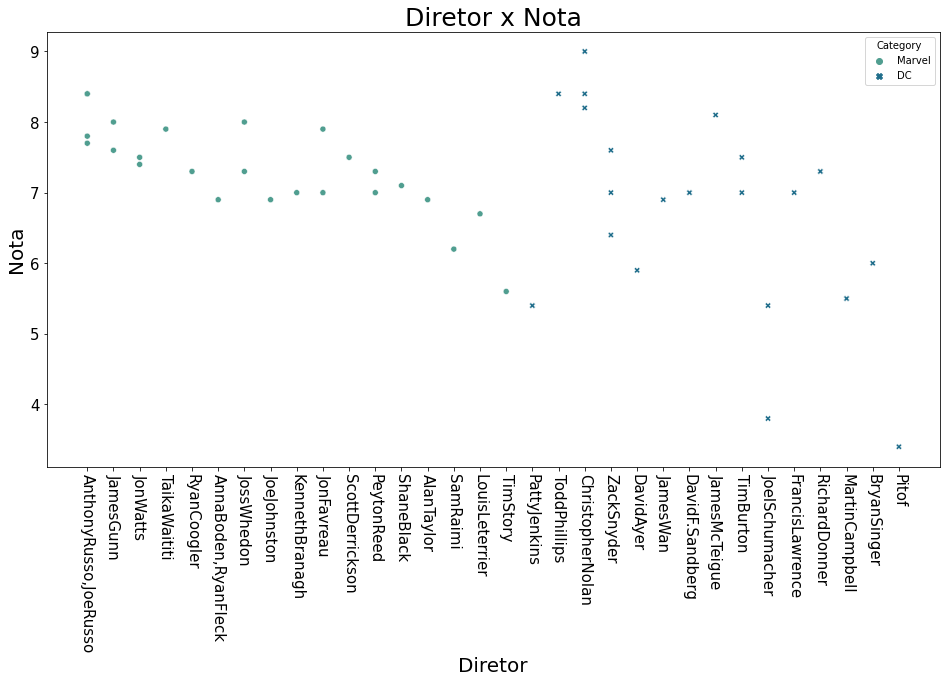

In [22]:
plt.figure(figsize=(16,8))
sns_p = sns.scatterplot(x=dados.Director,
                        y=dados.IMDB_Score, 
                        hue=dados.Category, 
                        style=dados.Category, 
                        palette="crest")
plt.xticks(rotation=-90);

sns_p.axes.set_title("Diretor x Nota",fontsize=25)
sns_p.set_xlabel("Diretor", size=20)
sns_p.set_ylabel("Nota", size=20);
sns_p.tick_params(labelsize=15)

Com esse gráfico conseguimos ver que os diretores da **Marvel à esquerda** e os diretores da **DC à direita**, assim é possível notar que existe uma **consistência maior entre as notas da Marvel**, as quais são no **geral bem positivas**. 

Enquanto alguns diretores da DC não fizeram tão bem seu papel...

## Concluindo a análise com mais algumas comparações: Marvel vs. DC

Fizemos muitas comparações e apresentamos dados sobre os títulos que mais fizeram sucesso, também fizemos algumas comparações breves entre as duas produtoras. Agora, vamos apresentar mais alguns dados que vão nos auxiliar a chegar a uma conclusão final, para isso, vamos usar algumas referências que já foram apresentadas anteriormente.

In [23]:
dados_categoria = dados.groupby("Category").mean()
media_notas = dados_categoria["IMDB_Score"]
media_notas = pd.DataFrame(media_notas)
media_notas = media_notas.rename(columns = {"IMDB_Score" : "Nota Média"})
media_notas

,Nota Média
Category,
DC,6.72381
Marvel,7.33200


Aqui temos a nota média que os filmes com mais avaliações receberam e podemos perceber que como era esperado, temos a **Marvel conseguiu uma média melhor**, pois já vínhamos vendo ao longo de toda a análise que ela tinha resultados mais consistentes. Entretanto a **DC não ficou tão atrás**, pois temos uma **diferença aproximada de 0,6 pontos**.

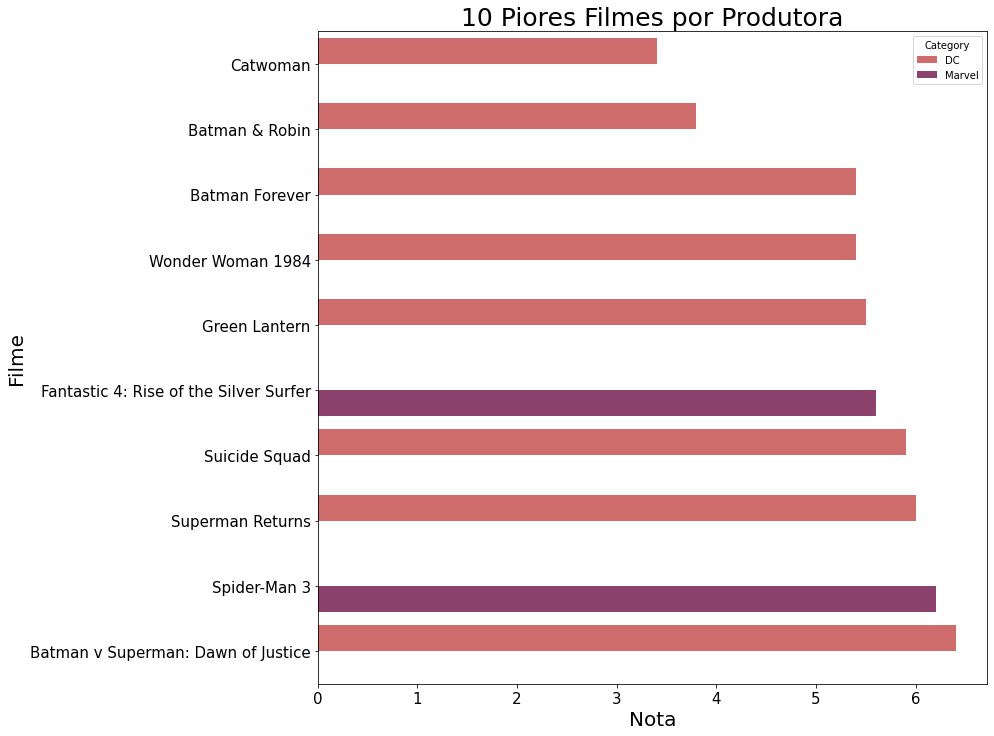

,Vezes entre os Piores
DC,8
Marvel,2


,Vezes entre os Melhores
Marvel,5
DC,5


In [29]:
ordenados = dados.sort_values(by="IMDB_Score")
piores = ordenados[:10]
melhores = ordenados[-10:]

plt.figure(figsize=(12,12))
sns_q = sns.barplot(x=piores["IMDB_Score"], 
                    y=piores["Movie"], 
                    palette="flare", hue=piores.Category)

sns_q.axes.set_title("10 Piores Filmes por Produtora",fontsize=25)
sns_q.set_xlabel("Nota", size=20)
sns_q.set_ylabel("Filme", size=20);
sns_q.tick_params(labelsize=15)
plt.show()

df_piores = pd.DataFrame(piores.Category.value_counts())
df_piores = df_piores.rename(columns={"Category" : "Vezes entre os Piores"})
df_melhores = pd.DataFrame(melhores.Category.value_counts())
df_melhores = df_melhores.rename(columns={"Category" : "Vezes entre os Melhores"})

display(df_piores)
display(df_melhores)

# Conclusão final

Depois do estudo sobre esses dados conseguimos obter diversas informações sobre as duas produtoras e com isso podemos tirar conclusões mais sólidas. Uma delas é que definitivamente a Marvel teve resultados menos oscilantes nos seus filmes, já a DC teve alguns deslizes graves, que com certeza afetaram negativamente a média geral dos filmes que ela produziu. 

Entretanto, podemos tirar mais informações quanto a esse resultado, pois podemos ver que apesar de a DC aparecer 8 vezes no TOP 10 dos piores filmes, ela aparece 5 vezes no TOP 10 dos melhores filmes, além disso, o primeiro lugar é dela com o “Cavaleiro das Trevas” e ainda conta com mais 2 filmes no TOP 5. 

 - Com isso, podemos ressaltar um questionamento interessante, o qual é embasado no fato de que a DC arrisca mais em metodologias de filmes diferentes? 
 - E quando acerta são os grandes sucessos que são, como a Trilogia do Batman e o filme do Coringa? 
 - E quando erra, erra muito feio e fica entre os piores filmes já produzidos?

Essas são questões que dizem muito sobre como a DC se comporta.


Já a Marvel optou muito pela receita que estava dando certo, fazendo filmes com a temática clássica de super heróis e não variando muito em seus aspectos cinematográficos inovadores, com isso ela conseguiu resultados consistentes no geral, mas sem muitos destaques exorbitantes, com exceção dos dois últimos filmes dos Vingadores, que realmente foram fenômenos de bilheteria.

Tendo tudo isso em vista podemos chegar ao resultado de que a melhor é… (suspense)... (rufar de tambores)... A melhor é o público aproveitar os aspectos positivos que cada uma das duas tem, pois apesar de estarem no mesmo contexto de super heróis, elas possuem propostas um pouco diferentes. Com isso, podemos ter uma variação no tipo de conteúdo dentro desse vasto universo, o que é um benefício, pois não vamos ficar sempre com a mesma coisa. Lembrando que o que é de qualidade ruim deve ser criticado mesmo, não importa de quem seja.  >:(